In [25]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [59]:
def polynomial_dataframe(feature, degree=3):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature  
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature**power
    return poly_dataframe

In [8]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [9]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)

In [10]:
poly1_data['price'] = sales['price']

In [20]:
lin_modl = linear_model.LinearRegression()


In [23]:
lin_modl.fit(poly1_data[['power_1']], poly1_data[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lin_modl.predict(poly1_data[['power_1']].values)

array([[  37800.09159579],
       [  60249.97702758],
       [  63056.21270656],
       ...,
       [2773879.8785959 ],
       [3337933.25006977],
       [3756062.36623697]])

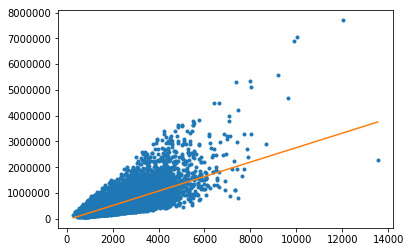

In [27]:
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', poly1_data['power_1'], lin_modl.predict(poly1_data[['power_1']]), '-')

In [62]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
poly2_data

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0
21332,390.0,152100.0,245000.0
8623,410.0,168100.0,325000.0
11500,420.0,176400.0,229050.0
14466,420.0,176400.0,280000.0
465,430.0,184900.0,80000.0


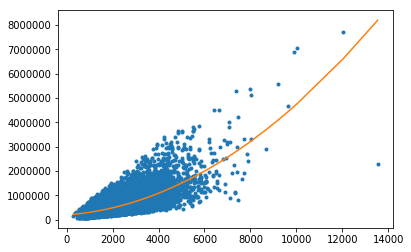

In [69]:
lin_mod2 = linear_model.LinearRegression()
lin_mod2.fit(poly2_data[['power_1']+['power_2']], poly2_data[['price']])
lin_mod2.predict(poly2_data[['power_1']+['power_2']].values)
%matplotlib inline
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
poly2_data[['power_1']], lin_mod2.predict(poly2_data[['power_1']+['power_2']]),'-')

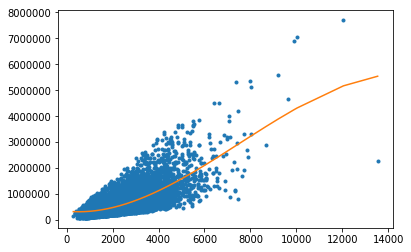

In [77]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
poly3_data

lin_mod3 = linear_model.LinearRegression()
lin_mod3.fit(poly3_data[['power_1']+['power_2']+['power_3']], poly3_data[['price']])
lin_mod3.predict(poly3_data[['power_1']+['power_2']+['power_3']].values)
%matplotlib inline
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
poly3_data[['power_1']], lin_mod3.predict(poly3_data[['power_1']+['power_2']+['power_3']]),'-')

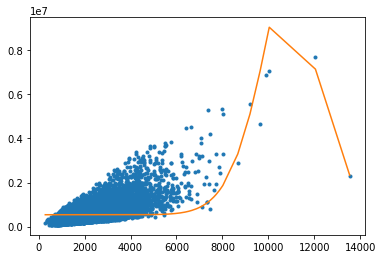

In [78]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
col = poly15_data.columns

lin_mod15 = linear_model.LinearRegression()
lin_mod15.fit(poly15_data[col], poly15_data[['price']])
lin_mod15.predict(poly15_data[col].values)
%matplotlib inline
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
poly15_data[['power_1']], lin_mod15.predict(poly15_data[col]),'-')

In [72]:
s1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
s2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
s3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
s4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

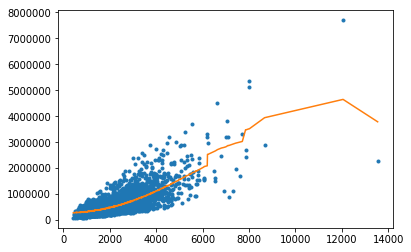

In [86]:
poly15_data_s1 = polynomial_dataframe(s1['sqft_living'], 15)
col = poly15_data_s1.columns
poly15_data_s1['price'] = s1['price']


lin_mod_s1 = linear_model.LinearRegression()
lin_mod_s1.fit(poly15_data_s1[col], poly15_data_s1[['price']])
lin_mod_s1.predict(poly15_data_s1[col].values)

%matplotlib inline
# plt.plot(poly15_data_s1['power_1'],poly15_data_s1['price'],'.',
# poly15_data_s1[['power_1']], lin_mod_s1.predict(poly15_data[col]),'-')

plt.plot(poly15_data_s1['power_1'],poly15_data_s1['price'],'.',
poly15_data_s1[['power_1']], lin_mod_s1.predict(poly15_data_s1[col]),'-')

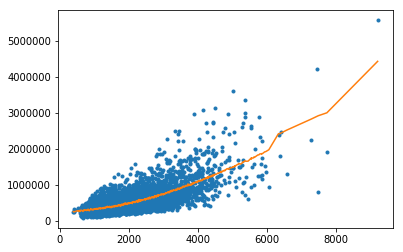

In [87]:
poly15_data_s2 = polynomial_dataframe(s2['sqft_living'], 15)
col = poly15_data_s2.columns
poly15_data_s2['price'] = s2['price']


lin_mod_s2 = linear_model.LinearRegression()
lin_mod_s2.fit(poly15_data_s2[col], poly15_data_s2[['price']])
lin_mod_s2.predict(poly15_data_s2[col].values)

%matplotlib inline
# plt.plot(poly15_data_s1['power_1'],poly15_data_s1['price'],'.',
# poly15_data_s1[['power_1']], lin_mod_s1.predict(poly15_data[col]),'-')

plt.plot(poly15_data_s2['power_1'],poly15_data_s2['price'],'.',
poly15_data_s2[['power_1']], lin_mod_s2.predict(poly15_data_s2[col]),'-')

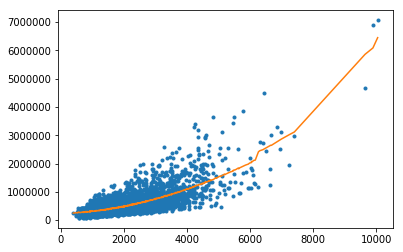

In [88]:
poly15_data_s3 = polynomial_dataframe(s3['sqft_living'], 15)
col = poly15_data_s3.columns
poly15_data_s3['price'] = s3['price']


lin_mod_s3 = linear_model.LinearRegression()
lin_mod_s3.fit(poly15_data_s3[col], poly15_data_s3[['price']])
lin_mod_s3.predict(poly15_data_s3[col].values)

%matplotlib inline
# plt.plot(poly15_data_s1['power_1'],poly15_data_s1['price'],'.',
# poly15_data_s1[['power_1']], lin_mod_s1.predict(poly15_data[col]),'-')

plt.plot(poly15_data_s3['power_1'],poly15_data_s3['price'],'.',
poly15_data_s3[['power_1']], lin_mod_s3.predict(poly15_data_s3[col]),'-')

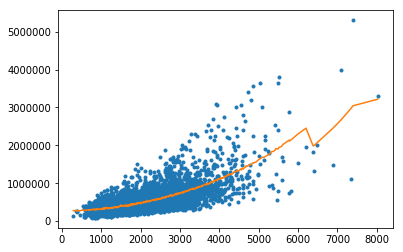

In [89]:
poly15_data_s4 = polynomial_dataframe(s4['sqft_living'], 15)
col = poly15_data_s4.columns
poly15_data_s4['price'] = s4['price']


lin_mod_s4 = linear_model.LinearRegression()
lin_mod_s4.fit(poly15_data_s4[col], poly15_data_s4[['price']])
lin_mod_s4.predict(poly15_data_s4[col].values)

%matplotlib inline
# plt.plot(poly15_data_s1['power_1'],poly15_data_s1['price'],'.',
# poly15_data_s1[['power_1']], lin_mod_s1.predict(poly15_data[col]),'-')

plt.plot(poly15_data_s4['power_1'],poly15_data_s4['price'],'.',
poly15_data_s4[['power_1']], lin_mod_s4.predict(poly15_data_s4[col]),'-')

In [90]:
train = pd.read_csv('wk3_kc_house_train_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')
valid = pd.read_csv('wk3_kc_house_valid_data.csv')

In [92]:
for i in range(1,16):  
    data = polynomial_dataframe(train['sqft_living'],i)
    val = polynomial_dataframe(valid['sqft_living'],i)
    col = data.columns
    data['price'] = train['price']
    val['price'] = valid['price']
    model=linear_model.LinearRegression()
    model.fit(data[col],data[['price']])
    print(((model.predict(val[col])-valid[['price']])**2).sum())

price    6.290979e+14
dtype: float64
price    6.239551e+14
dtype: float64
price    6.258203e+14
dtype: float64
price    6.299873e+14
dtype: float64
price    6.233784e+14
dtype: float64
price    6.232394e+14
dtype: float64
price    6.231637e+14
dtype: float64
price    6.234083e+14
dtype: float64
price    6.233655e+14
dtype: float64
price    6.234078e+14
dtype: float64
price    6.235298e+14
dtype: float64
price    6.233257e+14
dtype: float64
price    6.231799e+14
dtype: float64
price    6.231767e+14
dtype: float64
price    6.233669e+14
dtype: float64


In [93]:
for i in range(1,16):
    data = polynomial_dataframe(train['sqft_living'],i)
    val = polynomial_dataframe(valid['sqft_living'],i)
    col = data.columns
    coll =val.columns
    data['price'] = train['price']
    val['price'] = valid['price']
    model=linear_model.LinearRegression()
    model.fit(data[col],data[['price']])
    print(((model.predict(val[coll])-valid[['price']])**2).sum())

price    6.290979e+14
dtype: float64
price    6.239551e+14
dtype: float64
price    6.258203e+14
dtype: float64
price    6.299873e+14
dtype: float64
price    6.233784e+14
dtype: float64
price    6.232394e+14
dtype: float64
price    6.231637e+14
dtype: float64
price    6.234083e+14
dtype: float64
price    6.233655e+14
dtype: float64
price    6.234078e+14
dtype: float64
price    6.235298e+14
dtype: float64
price    6.233257e+14
dtype: float64
price    6.231799e+14
dtype: float64
price    6.231767e+14
dtype: float64
price    6.233669e+14
dtype: float64
